Tushar Lanjewar
23M0406

Q1

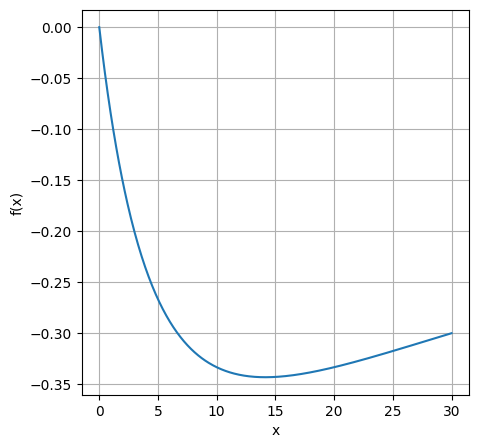

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
  return -0.1*x / ((1+0.1*x)*(1+0.05*x))

x = np.linspace(0,30,500)
y = f1(x)

plt.figure(figsize=(5, 5))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Q2

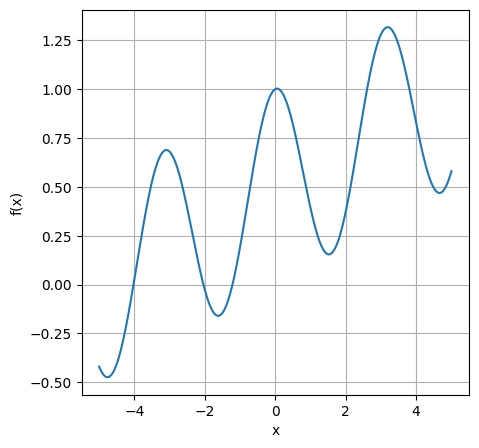

In [2]:
def f2(x):
  return np.cos(x)**2 + 0.1*x

x = np.linspace(-5,5,500)
y = f2(x)

plt.figure(figsize=(5, 5))
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

Q3

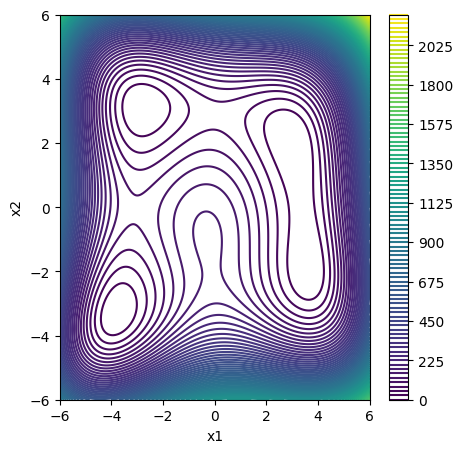

In [3]:
def f3(x1, x2):
  return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

x1 = np.linspace(-6,6, 500)
x2 = np.linspace(-6,6, 500)
x1, x2 = np.meshgrid(x1,x2)
y = f3(x1, x2)

#2d plot
plt.figure(figsize=(5, 5))
contour = plt.contour(x1, x2, y, levels=100, cmap='viridis')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

# #3d plot
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(5, 5))
# ax = fig.add_subplot(111, projection='3d')
# surf = ax.plot_surface(x1, x2, y, cmap='viridis', edgecolor='none')
# ax.set_xlabel('x1')
# ax.set_ylabel('x2')
# ax.set_zlabel('f(x1,x2)')
# ax.set_title('3D Contour Plot')
# plt.show()

Q4

In [4]:
def f(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Compute the gradient using central difference formula
def gradient(f, x, h=1e-5):
    n = len(x)
    grad = np.zeros(n)
    for i in range(n):
        x_forward = np.copy(x)
        x_backward = np.copy(x)
        x_forward[i] += h
        x_backward[i] -= h
        grad[i] = (f(x_forward) - f(x_backward)) / (2 * h)
    return grad

x_point = np.array([1.0, 2.0])
gradient(f, x_point)


array([-36., -32.])

In [5]:
def hessian(f, x, h=1e-5):
    n = len(x)  # Number of variables (in this case, 2)
    H = np.zeros((n, n))  # Initialize the Hessian matrix with zeros
    for i in range(n):
        for j in range(n):
            if i == j:
                # Diagonal elements: Second partial derivatives w.r.t. the same variable
                x_ij_forward = np.copy(x)
                x_ij_backward = np.copy(x)
                x_ij_forward[i] += h
                x_ij_backward[i] -= h
                f_ij_forward = f(x_ij_forward)
                f_ij_backward = f(x_ij_backward)
                H[i, j] = (f_ij_forward - 2*f(x) + f_ij_backward) / (h**2)

            else:
                # Off-diagonal elements: Mixed partial derivatives
               x_ij_forward = np.copy(x)
               x_ij_backward = np.copy(x)
               x_ij_forward[i] += h
               x_ij_forward[j] += h
               x_ij_backward[i] -= h
               x_ij_backward[j] -= h
               f_ij_forward = f(x_ij_forward)
               f_ij_backward = f(x_ij_backward)

               H[i, j] = (f_ij_forward - f(x_ij_forward - 2*h*np.eye(n)[i]) -
                           f(x_ij_forward - 2*h*np.eye(n)[j]) + f_ij_backward) / (4 * h**2)
    return H

h_matrix = hessian(f, x_point)
print(h_matrix)

[[-21.99982418  12.00003652]
 [ 12.00003652  26.00003768]]


Q5

In [6]:
import scipy.linalg
def definite(matrix):

  if not np.allclose(matrix, matrix.T):
    raise ValueError("The matrix is not symmetric.")

  P, L, U = scipy.linalg.lu(matrix)
  diag_elements = np.diag(U)

  if np.all(diag_elements > 0):
      return "Positive Definite"
  elif np.all(diag_elements < 0):
      return "Negative Definite"
  elif np.all(diag_elements >= 0) and np.any(diag_elements == 0):
      return "Positive Semidefinite"
  elif np.all(diag_elements <= 0) and np.any(diag_elements == 0):
      return "Negative Semidefinite"
  else:
      return "Indefinite"

definite(h_matrix)

'Indefinite'

In [7]:
 np.linalg.eig(h_matrix)

EigResult(eigenvalues=array([-24.83266354,  28.83287703]), eigenvectors=array([[-0.97324872, -0.22975407],
       [ 0.22975407, -0.97324872]]))